**SPARK PROJECT : ANALYSIS OF STOCK MARKET PREDICTION using
Numerical and Textual Analysis**

The project is on Stock Market Predictions based on Stock data of Dow Jones and the news headlines for the past 8 years. Stock prices of companies usually has a high impact depending on the things happening around the country. The idea is to use a company’s stock prices and the corresponding news headlines for 8 years and build a model which predicts the stock prices.

**DONE BY: VNS KEERTHANA SUDINA**







In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


1. Importing all the necessary libraries required

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from matplotlib import pyplot
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
import random


There are two datasets

1. Stock Prices Dataset for Dow Jones Inc (df-dataframee)

2. Top 25 headlines for everyday for the past 8 years (news-datframe)

In [ ]:
news=pd.read_csv("/content/drive/My Drive/RedditNews.csv") # Loading the dataset to a dataframe
news.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [ ]:
df=pd.read_csv("/content/drive/My Drive/DJIA_table.csv")  # Loading the dataset to a dataframe
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


2. Understanding of datasets

In [ ]:
print(df.shape)
print(news.shape)

(1989, 7)
(73608, 2)


In [ ]:
news.info() #shows columns, null values and datatype of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73608 entries, 0 to 73607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    73608 non-null  object
 1   News    73608 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [ ]:
news.describe() #gives us mean, standard deviation, min, max, count and otherfeatures of every feature in the data set

,Date,News
count,73608,73608
unique,2943,73537
top,2008-10-26,b'Why Russias response to Georgia was right'
freq,50,3


In [ ]:
df.describe() 

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [ ]:
news = news[news.Date.isin(df.Date)] # removing dates certain dates from news dataframe that are not present in the df dataframe 

3. Data Preparation - Preparing data for evaluation.

In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#function for data preprocessing
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'0,0', '00', text) 
    text = re.sub(r'[_"\-;%()|.,+&=*%.,!?:#@\[\]]', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\$', ' $ ', text)
    text = re.sub(r'u s ', ' united states ', text)
    text = re.sub(r'u n ', ' united nations ', text)
    text = re.sub(r'u k ', ' united kingdom ', text)
    text = re.sub(r'j k ', ' jk ', text)
    text = re.sub(r' s ', ' ', text)
    text = re.sub(r' yr ', ' year ', text)
    text = re.sub(r' l g b t ', ' lgbt ', text)
    text = re.sub(r'0km ', '0 km ', text)
    
    # removal of stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

In [ ]:
news['cleaned news'] = news.News.apply(clean_text) # applying the function to the news dataframe

In [ ]:
#applying tokenization on news 
tokenized_tweet = news['cleaned news'].apply(lambda x: x.split())

In [ ]:
tokenized_tweet

0        [117, year, old, woman, mexico, city, finally,...
1        [imf, chief, backs, athens, permanent, olympic...
2         [president, france, says, brexit, donald, trump]
3        [british, man, must, give, police, 24, hours, ...
4        [100, nobel, laureates, urge, greenpeace, stop...
                               ...                        
72078    [b, pentagon, thinks, attacking, iran, bad, id...
72079    [b, caucasus, crisis, georgia, invades, south,...
72080    [b, indian, shoe, manufactory, series, like, w...
72081    [b, visitors, suffering, mental, illnesses, ba...
72082                 [b, help, mexico, kidnapping, surge]
Name: cleaned news, Length: 49718, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
      tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
news['cleaned news'] = tokenized_tweet


In [ ]:
news

In [ ]:
#changing the datatype of Date column to datetime
news["Date"]= pd.to_datetime(news['Date'])

4. Classification of polarity

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from textblob import TextBlob

# compute sentiment scores (polarity),subjectivity and labels(positive, negative or neutral)
subjectivity = [round(TextBlob(article).sentiment.subjectivity, 3) for article in news['cleaned news']]
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news['cleaned news']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

news["polarity"]= sentiment_category_tb
news["score"]= sentiment_scores_tb
news["subjectivity"]=subjectivity

In [ ]:
#implemented vader for positive, negative, neutral and compound scores of each headline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
sentiment = news['cleaned news'].apply(lambda x: vader.polarity_scores(x))
news = pd.concat([news,sentiment.apply(pd.Series)],1)


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
news

,Date,News,cleaned news,polarity,score,subjectivity,neg,neu,pos,compound
0,2016-07-01,A 117-year-old woman in Mexico City finally re...,117 year old woman mexico city finally receive...,positive,0.033,0.400,0.153,0.847,0.000,-0.5574
1,2016-07-01,IMF chief backs Athens as permanent Olympic host,imf chief backs athens permanent olympic host,neutral,0.000,0.000,0.167,0.833,0.000,-0.0516
2,2016-07-01,"The president of France says if Brexit won, so...",president france says brexit donald trump,neutral,0.000,0.000,0.000,1.000,0.000,0.0000
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...,british man must give police 24 hours notice s...,positive,0.111,0.389,0.398,0.602,0.000,-0.8210
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...,100 nobel laureates urge greenpeace stop oppos...,neutral,0.000,0.000,0.239,0.761,0.000,-0.2960
...,...,...,...,...,...,...,...,...,...,...
72078,2008-08-08,b'Why the Pentagon Thinks Attacking Iran is a ...,b pentagon thinks attacking iran bad idea us n...,negative,-0.700,0.667,0.448,0.552,0.000,-0.7579
72079,2008-08-08,b'Caucasus in crisis: Georgia invades South Os...,b caucasus crisis georgia invades south ossetia,neutral,0.000,0.000,0.451,0.549,0.000,-0.6249
72080,2008-08-08,b'Indian shoe manufactory - And again in a se...,b indian shoe manufactory series like work,neutral,0.000,0.000,0.000,0.667,0.333,0.3612
72081,2008-08-08,b'Visitors Suffering from Mental Illnesses Ban...,b visitors suffering mental illnesses banned o...,negative,-0.100,0.200,0.756,0.244,0.000,-0.8519


5. Features selected and spliting of Train and Test dataset 

In [ ]:
x=news['cleaned news'] #x is the inputs given to the model
y=news['polarity'] #y is the output given to the model

In [ ]:
#spliting of input and output into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

6. Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.99, min_df=5, max_features=4800, stop_words='english', ngram_range=(1,2))
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)
print(train_vectors.shape, test_vectors.shape)

(37288, 4800) (12430, 4800)


In [ ]:
print(train_vectors)

  (0, 2879)	0.28080830780648725
  (0, 3174)	0.3204869074328768
  (0, 2445)	0.3618734081132214
  (0, 2726)	0.34516608066557725
  (0, 2405)	0.26215590085130897
  (0, 2877)	0.2553374476720121
  (0, 988)	0.39046327059920083
  (0, 4105)	0.4504900644482355
  (0, 2309)	0.2810997283901836
  (1, 2460)	0.3430241571394489
  (1, 1810)	0.4038056850437399
  (1, 2193)	0.3670714064256333
  (1, 3103)	0.3937995414087905
  (1, 2467)	0.3722400965899164
  (1, 163)	0.4406253677618558
  (1, 434)	0.3110345573911674
  (2, 2137)	0.4854343683946036
  (2, 1530)	0.695865057654449
  (2, 3115)	0.529268642106164
  (3, 1065)	0.3182183400088506
  (3, 3790)	0.2531509901319651
  (3, 2375)	0.3283157655947908
  (3, 653)	0.21612577044070308
  (3, 722)	0.20552618677500506
  (3, 3983)	0.24249079813252836
  :	:
  (37284, 3614)	0.16648262735584815
  (37284, 2100)	0.1678181649631417
  (37284, 2215)	0.1968550805507239
  (37284, 2879)	0.17025108070941644
  (37284, 2405)	0.15894232539958664
  (37284, 2877)	0.15480836999203576
  (37

7. Classification modeling

In [ ]:
#Naive Bayes Bernoulli

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB().fit(train_vectors, y_train)

In [ ]:
from  sklearn.metrics  import accuracy_score
predicted1 = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted1))

In [ ]:
print(accuracy_score(y_test,predicted1))
from sklearn.metrics import classification_report
print(classification_report(predicted1,y_test))
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(predicted1,y_test))

0.7827031375703942
              precision    recall  f1-score   support

    negative       0.67      0.75      0.71      2702
     neutral       0.88      0.82      0.85      6374
    positive       0.71      0.73      0.72      3354

    accuracy                           0.78     12430
   macro avg       0.75      0.77      0.76     12430
weighted avg       0.79      0.78      0.78     12430

[[2024  306  372]
 [ 510 5243  621]
 [ 466  426 2462]]


In [ ]:
#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classif = LogisticRegression().fit(train_vectors,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from  sklearn.metrics  import accuracy_score
predicted2 = classif.predict(test_vectors)
print(accuracy_score(y_test,predicted2))

0.8522928399034594


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predicted2,y_test))
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(predicted2,y_test))

              precision    recall  f1-score   support

    negative       0.72      0.90      0.80      2397
     neutral       0.98      0.83      0.90      7081
    positive       0.75      0.88      0.81      2952

    accuracy                           0.85     12430
   macro avg       0.82      0.87      0.83     12430
weighted avg       0.87      0.85      0.86     12430

[[2152   37  208]
 [ 570 5853  658]
 [ 278   85 2589]]


In [ ]:
#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clas = RandomForestClassifier().fit(train_vectors,y_train)
from  sklearn.metrics  import accuracy_score
predicted3 = clas.predict(test_vectors)
print(accuracy_score(y_test,predicted3))

In [ ]:
print(accuracy_score(y_test,predicted3))
from sklearn.metrics import classification_report
print(classification_report(predicted3,y_test))
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(predicted3,y_test))

0.8692679002413516
              precision    recall  f1-score   support

    negative       0.76      0.88      0.82      2587
     neutral       0.98      0.87      0.92      6703
    positive       0.78      0.86      0.82      3140

    accuracy                           0.87     12430
   macro avg       0.84      0.87      0.85     12430
weighted avg       0.88      0.87      0.87     12430

[[2283   51  253]
 [ 369 5827  507]
 [ 348   97 2695]]


In [ ]:
#Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB()
clf1.fit(train_vectors, y_train)
predicted4 = clf1.predict(test_vectors)
print(accuracy_score(y_test,predicted4))

In [ ]:
print(accuracy_score(y_test,predicted4))
from sklearn.metrics import classification_report
print(classification_report(predicted4,y_test))
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(predicted4,y_test))

0.7682220434432824
              precision    recall  f1-score   support

    negative       0.53      0.87      0.66      1837
     neutral       0.96      0.74      0.83      7730
    positive       0.65      0.78      0.71      2863

    accuracy                           0.77     12430
   macro avg       0.71      0.80      0.73     12430
weighted avg       0.82      0.77      0.78     12430

[[1595   50  192]
 [ 985 5718 1027]
 [ 420  207 2236]]


In [ ]:
news1=news[['Date','cleaned news','polarity','score','pos','neg','neu','compound','subjectivity']]

In [ ]:
#groupby the dataframe by Date feature so that all the headlines of one day will come under the same date
final=news1.groupby(['Date']).mean()

In [ ]:
final=final.reset_index()

8. Label on Rise (1) and Fall (0) of stock price

In [ ]:
#caalculating percentage change between stock price of current and previous day
df['change in percentage (%)'] = (df['Close'] - df['Open']) * 100 /df['Open']
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,change in percentage (%)
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,0.140195
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,1.226407
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,1.367208
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,1.275186
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,-1.238652


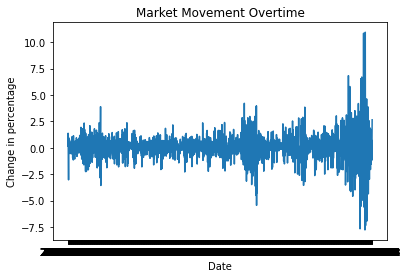

In [ ]:
df['change in percentage (%)'] 
plt.plot(df['Date'], df['change in percentage (%)'] )
plt.xlabel('Date')
plt.ylabel('Change in percentage')
plt.title("Market Movement Overtime")
plt.show()

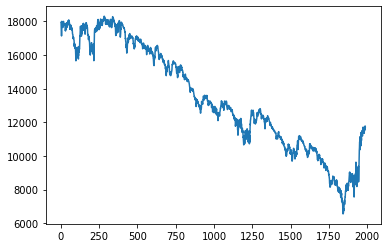

In [ ]:
plt.plot(df['Close'])

In [ ]:
#labelling the change in percentage (%) as 1(rise in price) or 0 (fall in price)
movement = []
for c in df['change in percentage (%)']:
    if c > 0:
        movement.append(1)
    elif c < 0:
        movement.append(0)
    else: movement.append(0)
df['Label'] = movement

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Adj Close,change in percentage (%),Label
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,0.140195,1
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,1.226407,1
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,1.367208,1
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,1.275186,1
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,-1.238652,0
...,...,...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.727184,1
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-0.858345,0
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-1.181752,0
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.449115,1


In [ ]:
df["Date"]= pd.to_datetime(df['Date']) #changing the datatype of Date feature

9. joining the datasets by dates 

In [ ]:
#merging the two dataset for further correlation modelling to predict stock price movements
merged_dataframe = final[['Date', 'subjectivity', 'pos', 'neg', 'neu']].merge(df, how='inner', on='Date', left_index=True)
print(merged_dataframe.shape)
merged_dataframe

(1989, 14)


,Date,subjectivity,pos,neg,neu,compound,Open,High,Low,Close,Volume,Adj Close,change in percentage (%),Label
1988,2008-08-08,0.15484,0.08800,0.24204,0.66984,-0.309516,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,2.643703,1
1987,2008-08-11,0.16664,0.10640,0.26608,0.62756,-0.170236,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.449115,1
1986,2008-08-12,0.34480,0.10252,0.21792,0.67952,-0.207112,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-1.181752,0
1985,2008-08-13,0.15584,0.10040,0.16168,0.73792,-0.103452,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-0.858345,0
1984,2008-08-14,0.27080,0.12120,0.22724,0.65160,-0.166048,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.727184,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2016-06-27,0.29872,0.13508,0.18844,0.67644,-0.064520,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,-1.238652,0
3,2016-06-28,0.28056,0.12832,0.16092,0.71080,-0.023352,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,1.275186,1
2,2016-06-29,0.22560,0.15204,0.22652,0.62144,-0.116408,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,1.367208,1
1,2016-06-30,0.16088,0.10048,0.23696,0.66256,-0.269716,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,1.226407,1


In [ ]:
final.dtypes #checking gthe datatypes

Date            datetime64[ns]
score                  float64
pos                    float64
neg                    float64
neu                    float64
compound               float64
subjectivity           float64
dtype: object

In [ ]:
print(merged_dataframe.describe())

       subjectivity          pos  ...  change in percentage (%)        Label
count   1989.000000  1989.000000  ...               1989.000000  1989.000000
mean       0.233709     0.086414  ...                  0.036604     0.541478
std        0.058030     0.026418  ...                  1.252473     0.498402
min        0.077360     0.015240  ...                 -7.783348     0.000000
25%        0.192920     0.067800  ...                 -0.439600     0.000000
50%        0.233880     0.085800  ...                  0.064172     1.000000
75%        0.272400     0.102800  ...                  0.569491     1.000000
max        0.437000     0.187960  ...                 10.932930     1.000000

[8 rows x 13 columns]


In [ ]:
print(merged_dataframe.shape)
print(merged_dataframe.info())

(1989, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 1988 to 0
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1989 non-null   datetime64[ns]
 1   subjectivity              1989 non-null   float64       
 2   pos                       1989 non-null   float64       
 3   neg                       1989 non-null   float64       
 4   neu                       1989 non-null   float64       
 5   compound                  1989 non-null   float64       
 6   Open                      1989 non-null   float64       
 7   High                      1989 non-null   float64       
 8   Low                       1989 non-null   float64       
 9   Close                     1989 non-null   float64       
 10  Volume                    1989 non-null   int64         
 11  Adj Close                 1989 non-null   float64       
 12  change in

In [ ]:
#Plotted histograms for individual columns to see the distribution of values.

#The x axis is the column values and the y axis is the frequency of those values.

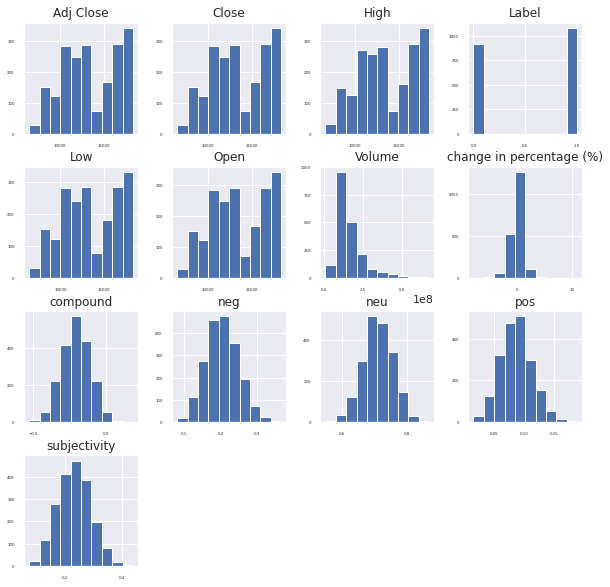

In [ ]:
sns.set()
merged_dataframe.hist(sharex = False, sharey = False, xlabelsize = 4, ylabelsize = 4, figsize=(10, 10))
pyplot.show()

In [ ]:
cols = list(merged_dataframe)
print(cols)
cols.append(cols.pop(cols.index('Label')))
merged_dataframe = merged_dataframe.loc[:, cols]
merged_dataframe.head()

['Date', 'subjectivity', 'pos', 'neg', 'neu', 'compound', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'change in percentage (%)', 'Label']


,Date,subjectivity,pos,neg,neu,compound,Open,High,Low,Close,Volume,Adj Close,change in percentage (%),Label
1988,2008-08-08,0.15484,0.08800,0.24204,0.66984,-0.309516,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,2.643703,1
1987,2008-08-11,0.16664,0.10640,0.26608,0.62756,-0.170236,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.449115,1
1986,2008-08-12,0.34480,0.10252,0.21792,0.67952,-0.207112,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-1.181752,0
1985,2008-08-13,0.15584,0.10040,0.16168,0.73792,-0.103452,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-0.858345,0
1984,2008-08-14,0.27080,0.12120,0.22724,0.65160,-0.166048,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.727184,1


In [ ]:
#converrting volume to float datatype
merged_dataframe['Volume'] = merged_dataframe['Volume'].astype(float)
print(cols)
#sorting the index values
merged_dataframe.index = merged_dataframe.index.sort_values()
merged_dataframe.head()

['Date', 'subjectivity', 'pos', 'neg', 'neu', 'compound', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'change in percentage (%)', 'Label']


,Date,subjectivity,pos,neg,neu,compound,Open,High,Low,Close,Volume,Adj Close,change in percentage (%),Label
0,2008-08-08,0.15484,0.08800,0.24204,0.66984,-0.309516,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312,2.643703,1
1,2008-08-11,0.16664,0.10640,0.26608,0.62756,-0.170236,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609,0.449115,1
2,2008-08-12,0.34480,0.10252,0.21792,0.67952,-0.207112,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727,-1.181752,0
3,2008-08-13,0.15584,0.10040,0.16168,0.73792,-0.103452,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961,-0.858345,0
4,2008-08-14,0.27080,0.12120,0.22724,0.65160,-0.166048,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688,0.727184,1


In [ ]:
print(merged_dataframe.describe())

       subjectivity          pos  ...     Adj Close        Label
count   1989.000000  1989.000000  ...   1989.000000  1989.000000
mean       0.233709     0.086414  ...  13463.032255     0.541478
std        0.058030     0.026418  ...   3144.006996     0.498402
min        0.077360     0.015240  ...   6547.049805     0.000000
25%        0.192920     0.067800  ...  10913.379883     0.000000
50%        0.233880     0.085800  ...  13025.580078     1.000000
75%        0.272400     0.102800  ...  16478.410156     1.000000
max        0.437000     0.187960  ...  18312.390625     1.000000

[8 rows x 12 columns]


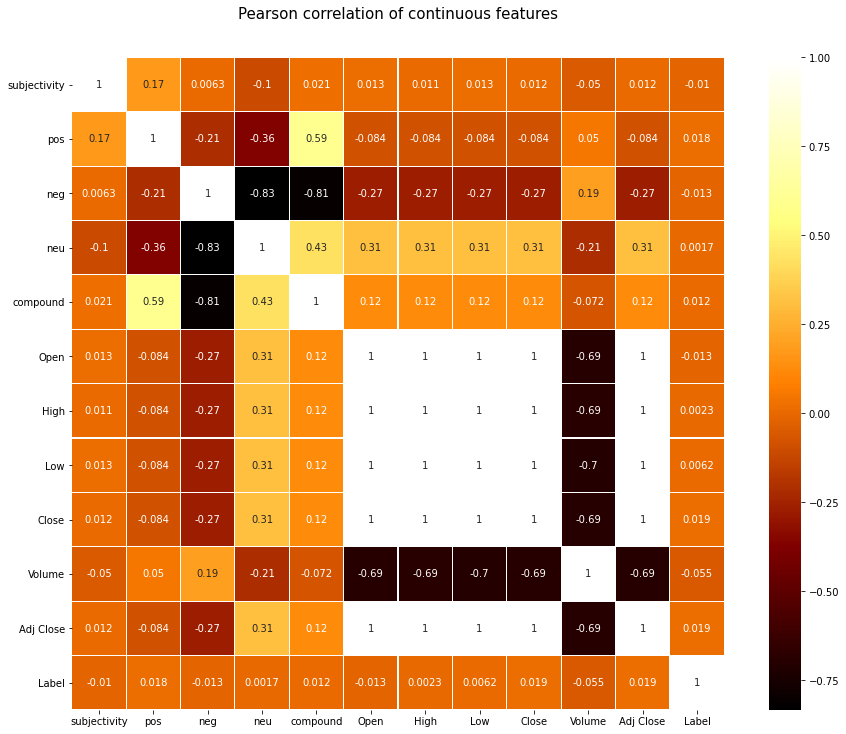

In [ ]:
#to find out the correlation between features to as to increase the prediction rate
colormap = pyplot.cm.afmhot
pyplot.figure(figsize=(16,12))
pyplot.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(merged_dataframe.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
pyplot.show()


10. Correlation Modeling to predict the stock price movement

In [ ]:
print(merged_dataframe.dtypes)
print(merged_dataframe.count())

# Change the NaN values to the mean value of that column
nan_list = ['subjectivity', 'compound', 'pos', 'neg', 'neu']
for col in nan_list:
    merged_dataframe[col] = merged_dataframe[col].fillna(merged_dataframe[col].mean())

# Recheck the count
print(merged_dataframe.count())


Date                        datetime64[ns]
subjectivity                       float64
pos                                float64
neg                                float64
neu                                float64
compound                           float64
Open                               float64
High                               float64
Low                                float64
Close                              float64
Volume                             float64
Adj Close                          float64
change in percentage (%)           float64
Label                                int64
dtype: object
Date                        1989
subjectivity                1989
pos                         1989
neg                         1989
neu                         1989
compound                    1989
Open                        1989
High                        1989
Low                         1989
Close                       1989
Volume                      1989
Adj Close            

In [ ]:
# Separate the dataframe for input(X) and output variables(y)
X = merged_dataframe.loc[:,'subjectivity':'Adj Close']
y = merged_dataframe.loc[:,'Label']
# Set the validation size, i.e the test set to 20%
validation_size = 0.20
train_size = int(len(X.index) * 0.7)
print(len(y))
print(train_size)
# Split the dataset to test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=42)

1989
1392


In [ ]:
# Set the number of folds to 10
num_folds = 10
scoring = 'accuracy'
# Append the models to the models list
models = []
models.append(('LR' , LogisticRegression()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('SVM' , SVC()))
models.append(('RF' , RandomForestClassifier()))
))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=3, random_state=50)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.534868 (0.025313)
KNN: 0.513515 (0.008020)
CART: 0.606533 (0.015892)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.539896 (0.024001)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.637332 (0.007735)


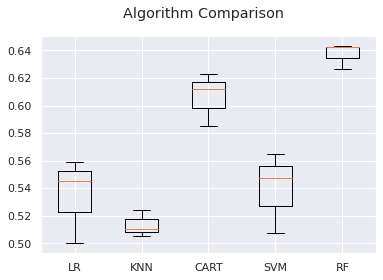

In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
#grid search applied only on Random forest beacuse of it higher accuracy compared to other models above

In [ ]:
#Random Forest

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model_rf = RandomForestClassifier(n_estimators=500,max_depth=12)
model_rf.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_rf.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

accuracy score:
0.6658291457286433
confusion matrix: 
[[ 84  88]
 [ 45 181]]
classification report: 
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       172
           1       0.67      0.80      0.73       226

    accuracy                           0.67       398
   macro avg       0.66      0.64      0.64       398
weighted avg       0.66      0.67      0.66       398



In [ ]:
#grid search applied to find more suitable parameters to increase the accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib

matplotlib.use('Agg')
model1 = RandomForestClassifier()
n_estimators = [150, 200, 250, 450, 500, 550, 1000]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
print(max_depth)
best_depth = 0
best_estimator = 0
max_score = 0
for n in n_estimators:
    for md in max_depth:
        model1 = RandomForestClassifier(n_estimators=n, max_depth=md)
        model1.fit(X_train, y_train)
        y_pred = model1.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        if score > max_score:
            max_score = score
            best_depth = md
            best_estimator = n
        print("Score is " + str(score) + " at depth of " + str(md) + " and estimator " + str(n))
print("Best score is " + str(max_score) + " at depth of " + str(best_depth) + " and estimator of " + str(best_estimator))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Score is 0.5653266331658291 at depth of 1 and estimator 150
Score is 0.5703517587939698 at depth of 2 and estimator 150
Score is 0.5879396984924623 at depth of 3 and estimator 150
Score is 0.5954773869346733 at depth of 4 and estimator 150
Score is 0.6055276381909548 at depth of 5 and estimator 150
Score is 0.6331658291457286 at depth of 6 and estimator 150
Score is 0.6457286432160804 at depth of 7 and estimator 150
Score is 0.6482412060301508 at depth of 8 and estimator 150
Score is 0.6407035175879398 at depth of 9 and estimator 150
Score is 0.6582914572864321 at depth of 10 and estimator 150
Score is 0.6608040201005025 at depth of 11 and estimator 150
Score is 0.6507537688442211 at depth of 12 and estimator 150
Score is 0.5678391959798995 at depth of 1 and estimator 200
Score is 0.5804020100502513 at depth of 2 and estimator 200
Score is 0.5778894472361809 at depth of 3 and estimator 200
Score is 0.6005025125628141 at depth of 4 and estimator 2

In [ ]:
#XGboost model

In [ ]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(random_state=50,n_estimators=1000, max_depth=3)
model_xgb.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_xgb.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

accuracy score:
0.8316582914572864
confusion matrix: 
[[130  42]
 [ 25 201]]
classification report: 
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       172
           1       0.83      0.89      0.86       226

    accuracy                           0.83       398
   macro avg       0.83      0.82      0.83       398
weighted avg       0.83      0.83      0.83       398



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib

matplotlib.use('Agg')
model = XGBClassifier()
n_estimators = [150, 200, 250, 450, 500, 550, 1000]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
print(max_depth)
best_depth = 0
best_estimator = 0
max_score = 0
for n in n_estimators:
    for md in max_depth:
        model = XGBClassifier(n_estimators=n, max_depth=md)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        if score > max_score:
            max_score = score
            best_depth = md
            best_estimator = n
        print("Score is " + str(score) + " at depth of " + str(md) + " and estimator " + str(n))
print("Best score is " + str(max_score) + " at depth of " + str(best_depth) + " and estimator of " + str(best_estimator))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Score is 0.592964824120603 at depth of 1 and estimator 150
Score is 0.6708542713567839 at depth of 2 and estimator 150
Score is 0.7160804020100503 at depth of 3 and estimator 150
Score is 0.7412060301507538 at depth of 4 and estimator 150
Score is 0.7537688442211056 at depth of 5 and estimator 150
Score is 0.7788944723618091 at depth of 6 and estimator 150
Score is 0.7412060301507538 at depth of 7 and estimator 150
Score is 0.7688442211055276 at depth of 8 and estimator 150
Score is 0.7537688442211056 at depth of 9 and estimator 150
Score is 0.7688442211055276 at depth of 10 and estimator 150
Score is 0.7487437185929648 at depth of 11 and estimator 150
Score is 0.7512562814070352 at depth of 12 and estimator 150
Score is 0.5979899497487438 at depth of 1 and estimator 200
Score is 0.6934673366834171 at depth of 2 and estimator 200
Score is 0.7487437185929648 at depth of 3 and estimator 200
Score is 0.7688442211055276 at depth of 4 and estimator 20

In [ ]:
from google.colab import files
merged_dataframe.to_csv("finaldataset.csv")
files.download('finaldataset.csv')